<a href="https://colab.research.google.com/github/ymuto0302/base1_2021/blob/main/GIS1_2_GeoPandas_ShapeFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 地理情報の活用(1-2)：shape ファイルの利用
GeoPandas が提供するデータセットは僅かである。

一方，現実の地理情報システムにおいて利用される地理情報データは shape file として提供される。

---
## shape file の入手
標準的な日本地図の shape file "全国市区町村界データ" が ESRIジャパンから提供されている。

| 製品 | ESRIジャパン

https://www.esrij.com/products/japan-shp/

上記より "全国市区町村界データ" をダウンロードすると，japan_ver83.zip が得られる。これを適当なディレクトリへ展開する。

展開すると，japan_ver83.shp を含む複数のファイルが得られるから，それらを GoogleDrive 上の特定のフォルダに置いておく。

---
## (準備) GeoPandas のインストール (Google Colab の場合)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.1 MB/s 
     |████████████████████████████████| 15.4 MB 34 kB/s 
     |████████████████████████████████| 6.3 MB 50.1 MB/s 


---
### (準備) Google Drive のマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## shapeファイルの利用

In [ ]:
import geopandas as gpd

# シェイプファイルからのデータ読み込み
# (注意) ファイルの置き場所をフルパスで与えること
path = r'/content/drive/My Drive/BASE/GeoData/japan_ver83/japan_ver83.shp'
japan = gpd.read_file(path, encoding='shiftjis')

In [ ]:
# データの中身を覗き見る
japan.head()

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,geometry
0,01101,北海道,石狩振興局,None,札幌市,中央区,"Sapporo-shi, Chuo-ku",238198.0,144196.0,"POLYGON ((141.34233 43.06682, 141.35520 43.068..."
1,01102,北海道,石狩振興局,None,札幌市,北区,"Sapporo-shi, Kita-ku",286186.0,153109.0,"POLYGON ((141.40839 43.18395, 141.40427 43.182..."
2,01103,北海道,石狩振興局,None,札幌市,東区,"Sapporo-shi, Higashi-ku",261922.0,143130.0,"POLYGON ((141.44698 43.15513, 141.44860 43.153..."
3,01104,北海道,石狩振興局,None,札幌市,白石区,"Sapporo-shi, Shiroishi-ku",213211.0,123314.0,"POLYGON ((141.46569 43.10000, 141.46812 43.097..."
4,01105,北海道,石狩振興局,None,札幌市,豊平区,"Sapporo-shi, Toyohira-ku",223562.0,128353.0,"POLYGON ((141.38479 43.04660, 141.38558 43.047..."


(コメント) 上記は北海道・札幌市が見えている。札幌市は政令指定都市であるため，区単位で POLYGON が設定されている。


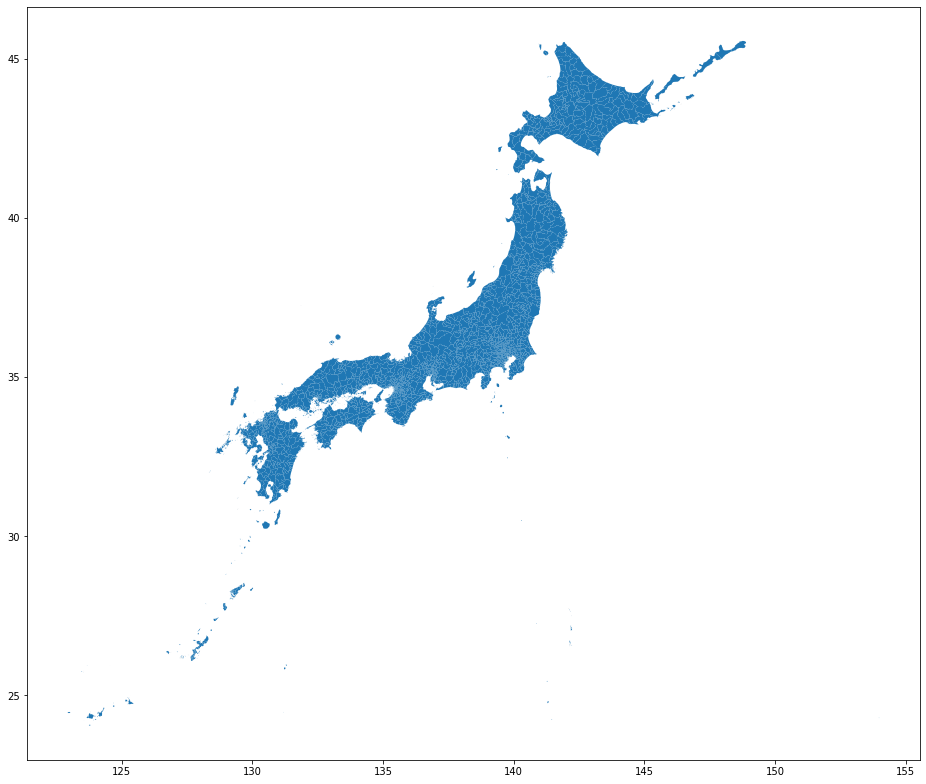

In [ ]:
# 可視化
japan.plot(figsize=(16,16))

---
## 山口県のみを取り出す
先の「全国市区町村界データ」から山口県のデータのみを取り出す。

下記のとおり，市町村別に POLYGON が設定されている。

In [ ]:
yamaguchi = japan[japan['KEN']=='山口県'] # 条件を指定し，山口県のデータのみ抽出
yamaguchi.head() # 中身を覗き見る

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,geometry
1501,35201,山口県,None,None,None,下関市,Shimonoseki-shi,260897.0,130329.0,"MULTIPOLYGON (((130.93185 33.93428, 130.93056 ..."
1502,35202,山口県,None,None,None,宇部市,Ube-shi,164255.0,79353.0,"MULTIPOLYGON (((131.24604 33.92134, 131.24491 ..."
1503,35203,山口県,None,None,None,山口市,Yamaguchi-shi,191529.0,89273.0,"MULTIPOLYGON (((131.42100 33.96758, 131.42012 ..."
1504,35204,山口県,None,None,None,萩市,Hagi-shi,46439.0,23278.0,"MULTIPOLYGON (((131.39781 34.42499, 131.39601 ..."
1505,35206,山口県,None,None,None,防府市,Hofu-shi,115888.0,56071.0,"MULTIPOLYGON (((131.69697 33.94638, 131.69929 ..."


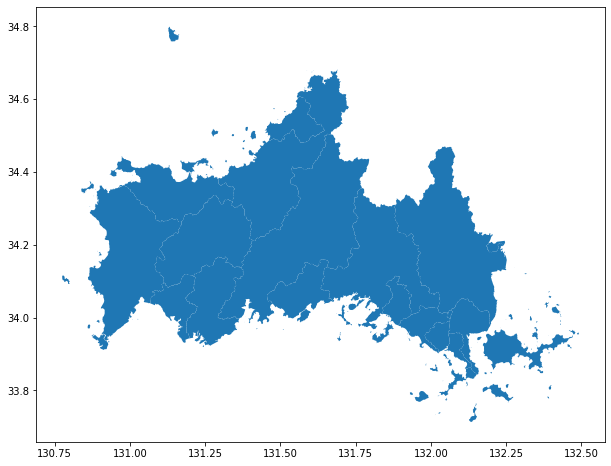

In [ ]:
# 一応，可視化しておく
yamaguchi.plot(figsize=(16, 8))

---
## 複数の地理情報を重ねる
国土交通省の展開するGISホームページ  https://nlftp.mlit.go.jp/ では国土数値情報，国土調査結果等が公表されている。

ここから「山口県に設置されたバス停留所のデータ」を取得する。
手順は以下のとおり：

1. 上記 Web ページにて「国土数値情報ダウンロードへ」をクリック
1. 国土数値情報ダウンロードのページにて「4.交通：交通：バス停留所（ポイント）」をクリック
1. バス停留所データのページにて「山口県」を選択し，山口県のデータ "P11-10_35_GML.zip" をダウンロード
1. "P11-10_35_GML.zip" を展開し，適当なディレクトリに設置



In [ ]:
# シェイプファイルからのデータ読み込み
path = '/content/drive/My Drive/BASE/GeoData/P11-10_35_GML/P11-10_35-jgd-g_BusStop.shp'
bus_stop = gpd.read_file(path, encoding='shiftjis')

In [ ]:
# データの中身を確認する
bus_stop.head()

,P11_001,P11_002,P11_003_1,P11_003_2,P11_003_3,P11_003_4,P11_003_5,P11_003_6,P11_003_7,P11_003_8,P11_003_9,P11_003_10,P11_003_11,P11_003_12,P11_003_13,P11_003_14,P11_003_15,P11_003_16,P11_003_17,P11_003_18,P11_003_19,P11_004_1,P11_004_2,P11_004_3,P11_004_4,P11_004_5,P11_004_6,P11_004_7,P11_004_8,P11_004_9,P11_004_10,P11_004_11,P11_004_12,P11_004_13,P11_004_14,P11_004_15,P11_004_16,P11_004_17,P11_004_18,P11_004_19,geometry
0,小島,"1,1","石見交通（株）,防長交通（株）",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"二条線,尾浦入口・田万川〜弥富支所前〜梼の木",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.69599 34.60392)
1,畠田,1,石見交通（株）,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,二条線,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.69991 34.60295)
2,保田,1,石見交通（株）,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,二条線,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.71020 34.60145)
3,北谷,"1,1,1","石見交通（株）,石見交通（株）,防長交通（株）",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"小浜江崎線,萩線,尾浦入口・田万川〜弥富支所前〜梼の木",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.61574 34.62631)
4,帆柱,"1,1,1","石見交通（株）,石見交通（株）,防長交通（株）",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"小浜江崎線,萩線,尾浦入口・田万川〜弥富支所前〜梼の木",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.63634 34.62629)


かなり横に長いデータフレームだから，geometry の列のみをチェックする。
以下のとおり，バス停留所の緯度・経度が POINT として与えられていることが分かる。

In [ ]:
# 位置情報のみを確認 → バス停留所の緯度・経度が POINT として与えられている。
bus_stop.geometry.head()

0    POINT (131.69599 34.60392)
1    POINT (131.69991 34.60295)
2    POINT (131.71020 34.60145)
3    POINT (131.61574 34.62631)
4    POINT (131.63634 34.62629)
Name: geometry, dtype: geometry

ここまでで

- 山口県の地理情報データ (yamaguchi)
- 山口県内のバス停留所データ (bus_stop)

が得られた。
これらを重ね合わせて可視化するには，ax を用いる。

ここで，ax は Artist と呼ばれるオブジェクトの一種であり，図を描くためのキャンバスと捉えればよい。

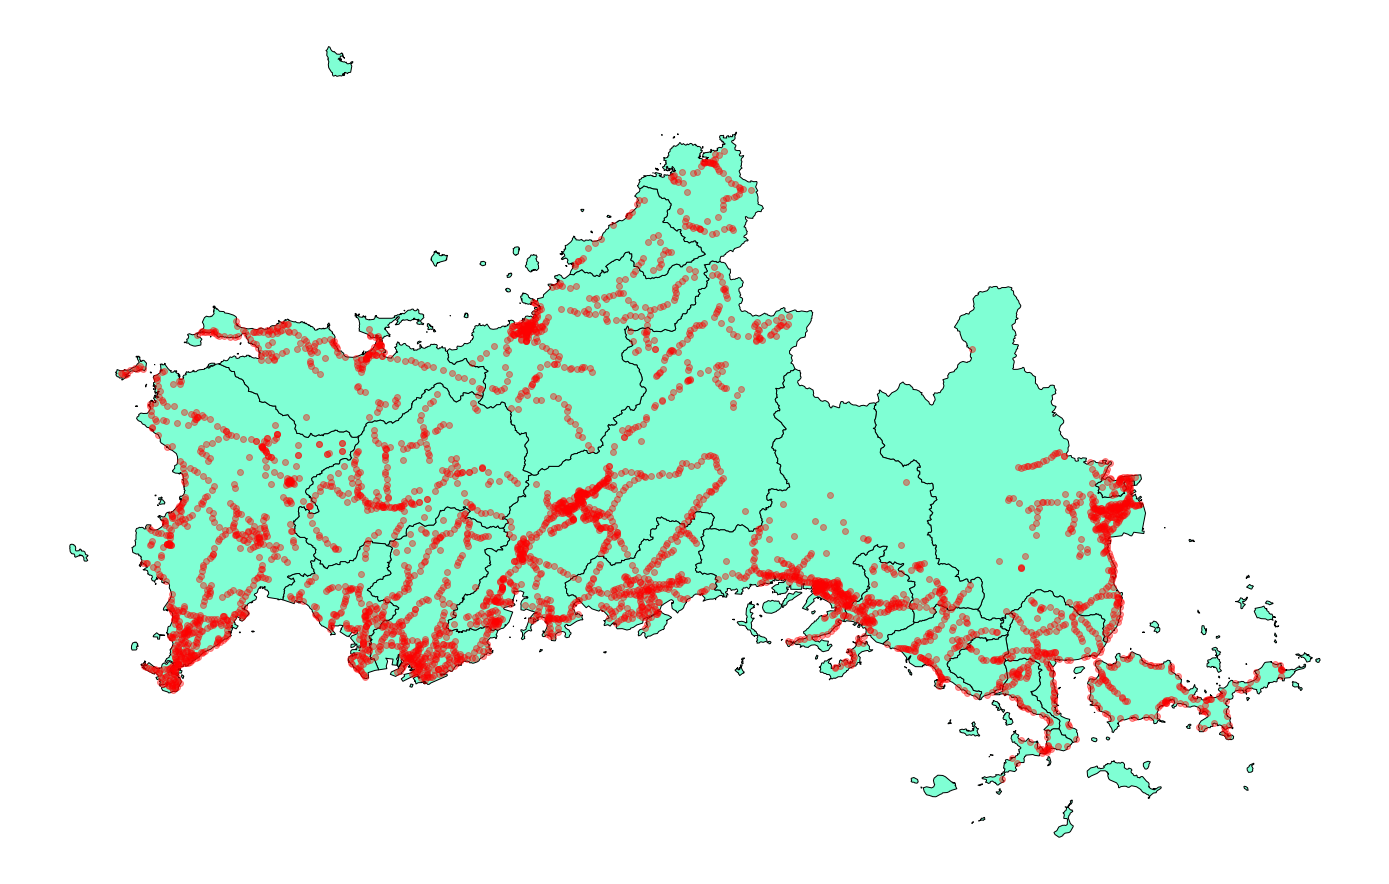

In [ ]:
# 可視化
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(32,16))

yamaguchi.plot(ax=ax, color='aquamarine', edgecolor="black")
bus_stop.plot(ax=ax, color='red', alpha=0.4)

ax.axis('off')
plt.show()

## （課題）
「国土数値情報ダウンロード」から「3.地域：施設：医療機関（ポイント）→ 山口県（平成26年)」の shape file をダウンロードし，山口県の地図と重ねて可視化せよ。